<a href="https://colab.research.google.com/github/abraar0305/abraar0305.github.io/blob/master/Sentiment_Analysis_film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/MSIB

/content/drive/MyDrive/MSIB


In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
donniebrasco,\n\nDonnie Brasco is a 1997 American crime dra...,The Godfather
scarface,\n\nA DE PALMA MOVIE FOR PEOPLE WHO DON’T LIKE...,Donnie Brasco
thegodfather,\n\nReciprocity with a Vengeance\n \nThe openi...,scarface
theirishman,\n\nSynopsis\nThe film opens in the early 2000...,the irishman


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each movie
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
donniebrasco,\n\nDonnie Brasco is a 1997 American crime dra...,The Godfather,0.014538,0.525570
scarface,\n\nA DE PALMA MOVIE FOR PEOPLE WHO DON’T LIKE...,Donnie Brasco,0.056993,0.488952
thegodfather,\n\nReciprocity with a Vengeance\n \nThe openi...,scarface,0.176099,0.452059
theirishman,\n\nSynopsis\nThe film opens in the early 2000...,the irishman,0.067066,0.516425


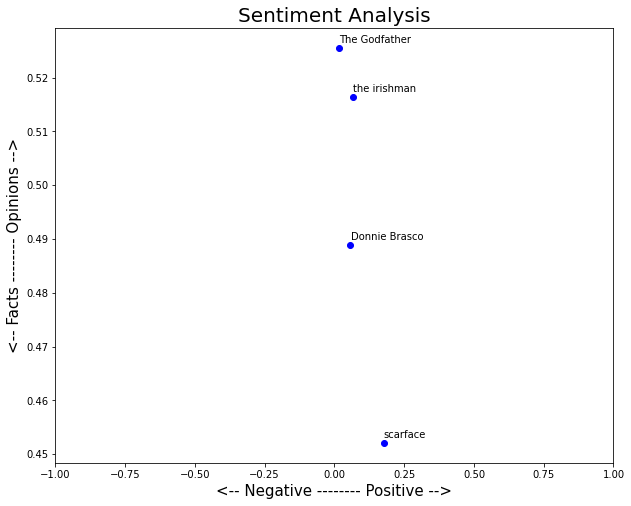

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
# Split each movie into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
donniebrasco,\n\nDonnie Brasco is a 1997 American crime dra...,The Godfather,0.014538,0.525570
scarface,\n\nA DE PALMA MOVIE FOR PEOPLE WHO DON’T LIKE...,Donnie Brasco,0.056993,0.488952
thegodfather,\n\nReciprocity with a Vengeance\n \nThe openi...,scarface,0.176099,0.452059
theirishman,\n\nSynopsis\nThe film opens in the early 2000...,the irishman,0.067066,0.516425


In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces


[['\n\nDonnie Brasco is a 1997 American crime drama film directed by Mike Newell, and starring Al Pacino and Johnny Depp. Michael Madsen, Bruno Kirby, James Russo, and Anne Heche appeared in supporting roles. The film, written by Paul Attanasio, is based on the 1988 nonfiction book Donnie Brasco: My Undercover Life in the Mafia by Joseph D. Pistone, assisted by Richard Woodley.\nThe film is loosely based on the true story of Joseph D. Pistone (Depp), an FBI undercover agent who infiltrated the Bonanno crime family in New York City during the 1970s, under the alias Donnie Brasco. Brasco maneuvers his way into the confidence of an aging Mafia hitman, Lefty Ruggiero (Pacino), who vouches for him. As Donnie moves deeper into the Mafia, he realizes that not only is he crossing the line between federal agent and criminal, but also leading his friend Lefty to an almost certain death.\n* * *\nIn 1970s New York City, Lefty, an aging gangster in the Bonanno crime family, is introduced to a jewel

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

4

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.13255183705183707,
  -0.027896825396825423,
  0.20980822028423776,
  -0.02668463203463202,
  -0.09382380875476806,
  -0.02064587198515772,
  -4.300659657804087e-05,
  -0.008974663995325169,
  0.016530012646084058,
  0.034384120858177464],
 [0.010688899577788466,
  0.00996503496503496,
  0.21938131313131318,
  0.13605263157894737,
  0.10515873015873016,
  0.10526315789473684,
  0.018939393939393936,
  0.04638888888888889,
  -0.1529761904761905,
  0.11415289256198345],
 [0.38,
  0.17,
  0.21666666666666665,
  0.25,
  -0.09999999999999999,
  0.5,
  0.27999999999999997,
  -0.06836734693877553,
  0.011111111111111112,
  0.2949494949494949],
 [0.05707044893091406,
  0.014909404418333024,
  0.10128271456804062,
  0.04641486082960078,
  0.14008430580577108,
  0.04757740156668725,
  0.01999469323021152,
  0.07177939765875813,
  0.12490506436899393,
  0.0369561375914915]]

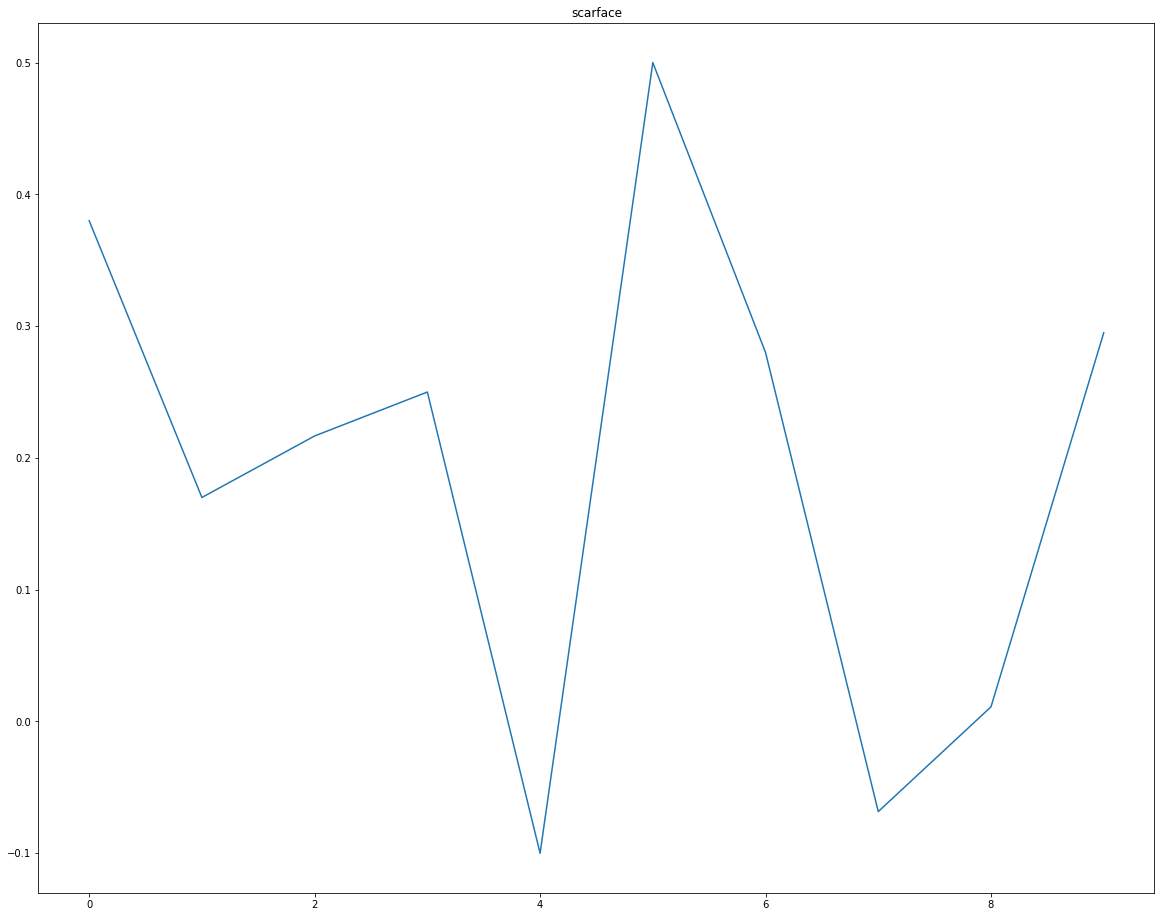

In [ ]:
# Show the plot for one movie
plt.plot(polarity_transcript[2])
plt.title(data['full_name'].index[1])
plt.show()

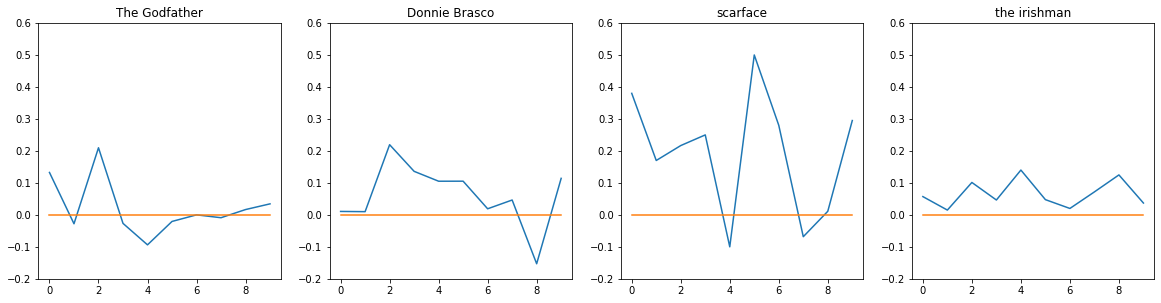

In [ ]:
# Show the plot for all movies
plt.rcParams['figure.figsize'] = [20, 16]

for index, movie in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.6)
    
plt.show()